This notebook corresponds to part (c) of the REU plan. The focus of this exercise is reviewing the use of quasi-phase matching in nonlinear interactions. We will be looking at sum-frequency generation (SFG) in this case.
All equations will again be referenced from *Boyd*$^{[1]}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import RK45, odeint, solve_ivp
from scipy.special import expit
import math

Consider eqs. 2.2.10-2.2.12b from *Boyd* for SFG:
$$\frac{dA_1}{dz} = \frac{2id_{eff}\omega_1^2}{k_1c^2}A_3A_2^*e^{-i\Delta kz}$$
$$\frac{dA_2}{dz} = \frac{2id_{eff}\omega_2^2}{k_2c^2}A_3A_1^*e^{-i\Delta kz}$$
$$\frac{dA_3}{dz} = \frac{2id_{eff}\omega_3^2}{k_3c^2}A_1A_2e^{i\Delta kz}$$

$$\Delta k = k_1+k_2-k_3$$

For QPM, however, a relation for $d_{eff}$ follows (eqn. 2.4.1): 
$$d_{eff}(z) = d_{eff}(0)sign[cos(\frac{2\pi z}{\Lambda})]$$
Where we will use $\Lambda = \frac{2\pi}{|\Delta k|}$ for optimal growth.

The undepleted pump approximation won't be used for this exercise, and we associate frequencies $(\omega_1,\omega_2,\omega_3)$ with amplitudes $(A_1, A_2, A_3)$, and initial conditions $(A_1 = 10, A_2 = 100, A_3 = 0)$ for simplicity. Arbitrary variables are defined below.

In [2]:
i = 0.0+1.0j; k1 = 1.3*10**12; k2 = 1.3*10**12; k3 = 2.60*10**12-2000; w1 = 3*10**12; d =10; c = 3*10**8
w3 = 5*10**12; w2 = w3 - w1
K1 = 2*1j*w1**2*d/(c**2*k1)
K2 = 2*1j*w2**2*d/(c**2*k2)
K3 = 2*1j*w3**2*d/(c**2*k3)
delta_k = k1+k2-k3 #Just made it 2000 this time. 


Similar code to part (b) with an added equation for QPM is defined:

In [3]:
def dAdz(z,S):
    return (K1*A3*np.conj(A2), 
            K2*A3*np.conj(A1), 
            K3*A1*A2)

def dAdz2(z, S): #delta_k != 0
    A1, A2, A3 = S
    return (K1*A3*np.conj(A2)*np.exp(-1j*delta_k*z),
            K2*A3*np.conj(A1)*np.exp(-1j*delta_k*z), 
            K3*A1*A2*np.exp(1j*delta_k*z))
def dAdz3(z, S):
    A1, A2, A3 = S
    return (K1*A3*np.conj(A2)*np.exp(-1j*delta_k*z)*np.sign(np.cos(z*delta_k)),
            K2*A3*np.conj(A1)*np.exp(-1j*delta_k*z)*np.sign(np.cos(z*delta_k)), 
            K3*A1*A2*np.exp(1j*delta_k*z)*np.sign(np.cos(z*delta_k)))

z_max = 4*np.pi/delta_k


A1 = 10+0.0j; A2 = 100+0.0j; A3 = 0+0.0j

y0 = [A1,A2,0]

sol1 = RK45(dAdz,0.0,y0,z_max, z_max/1000, z_max/1000)
sol2 = solve_ivp(dAdz2,np.array([0,z_max]),y0, t_eval = np.linspace(0,z_max,1000))
sol3 = solve_ivp(dAdz3,np.array([0,z_max]),y0, t_eval = np.linspace(0,z_max,1000))

z_OPA = [];
A1_OPA = []
A2_OPA = []
A3_OPA = []

for i in range(1000):
    sol1.step()
    A1_OPA.append(np.abs(sol1.y[0].imag))
    A2_OPA.append(np.abs(sol1.y[1].imag))
    A3_OPA.append(np.abs(sol1.y[2].imag))
    z_OPA.append(sol1.t/2*delta_k) 
    if sol1.status == "finished":
        break
        
z2_OPA = sol2.t/2*delta_k
A1_OPA2 = (sol2.y[0].imag)
A2_OPA2 = (sol2.y[1].imag)
A3_OPA2 = (sol2.y[2].imag)

z3_OPA = sol3.t/2*delta_k
A1_OPA3 = np.abs(sol3.y[0].imag)
A2_OPA3 = np.abs(sol3.y[1].imag)
A3_OPA3 = np.abs(sol3.y[2].imag)
        
zero = np.zeros(len(z_OPA))

Finally, a plot of field amplitude for every method of phase matching in SFG vs. propagation distance is drawn below:

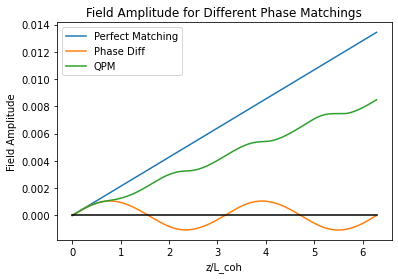

In [4]:
plt.plot(z_OPA,A3_OPA)
plt.plot(z2_OPA,A3_OPA2)
plt.plot(z3_OPA,A3_OPA3)
plt.plot(z_OPA,zero,"black")
plt.xlabel("z/L_coh")
plt.ylabel("Field Amplitude")
plt.legend(["Perfect Matching", "Phase Diff", "QPM"])
plt.title("Field Amplitude for Different Phase Matchings")
plt.show()

A clear resemblance to fig. 2.4.2 can be seen! It might be important to mention that the graph itself is **very** zoomed in at the start of the function to resemble the aforementioned figure. I.e, perfect matching should naturally be sinusoidal over a reasonably long distance.

## References:

[1]: Boyd, Robert W. Nonlinear Optics. San Diego, CA: Academic Press, 2003. Print.